# Especialização em Inteligência Artificial – IFMG Campus Ouro Preto

**Trabalho da disciplina de Aprendizado de Máquina**

**Autor**: Marco Antonio do Nascimento

**Professor**: Frederico Gadelha Guimarães

O **objetivo** deste trabalho é realizar uma tarefa de aprendizado de máquina do tipo classificação utilizando dados de cotações de ações da bolsa brasileira. A tarefa consiste em prever se o preço de fechamento de uma ação será maior ou menor do que o preço de abertura.

Para tanto serão usadas **duas bases de dados**: uma contendo o desempenho de um unico **mês** e outra com o desempenho de um unico **dia**. 

O trabalho foi dividido da seguinte forma: 

**Coleta de Dados** : Foram coletados os dados de cotações de diversas ações da bolsa brasileira (simbolos_ibov) utilizando a biblioteca yfinance. 
Para tanto utilizou-se duas bases de dados distintas, uma com o desempenho mensal ((start='2023-06-20', end='2023-07-20') e outra com o desempenho anual (start='2023-07-19', end='2023-07-20').

**Pré-processamento dos Dados**: Os dados coletados foram pré-processados para a criação da variável alvo binária (0 para desempenho negativo e 1 para desempenho positivo), que indica se o preço de fechamento é maior do que o preço de abertura. Além disso, foram selecionadas as características financeiras relevantes para o treinamento do modelo, normalizadas e codificadas em valores numéricos.

**Divisão dos Dados:** Os dados foram divididos em conjuntos de treinamento e teste utilizando o método hold-out, onde 80% dos dados foram destinados ao treinamento do modelo e 20% para teste.

**Modelagem e Avaliação:** Foram implementados três modelos de classificação: K-NN (K-Nearest Neighbors), Naive Bayes e Árvore de Decisão. Para cada modelo, foi realizado o treinamento utilizando o conjunto de treinamento e, em seguida, a avaliação do desempenho no conjunto de teste. A acurácia média foi calculada utilizando o método de validação cruzada K-Fold com 5 folds.

**Visualização dos Resultados:** Foram plotados gráficos para comparar a acurácia média dos três modelos. Além disso, foram gerados relatórios de classificação médios para cada modelo, incluindo métricas como precisão, recall e F1-score para cada classe (0 e 1).

**Visualização Adicional:** Foram adicionados comandos para plotar a superfície de decisão do K-NN, a distribuição de valores para cada atributo em cada classe para o Naive Bayes e a árvore de decisão.

O trabalho visa explorar diferentes métodos de classificação e avaliar seu desempenho na tarefa de **prever se o preço de fechamento de uma ação será maior ou menor do que o preço de abertura. Além disso, também inclui visualizações para melhor compreensão dos resultados obtidos pelos modelos**.

## O código abaixo apresenta os dados de desempenho MENSAL treinados, testados e pré-processados 

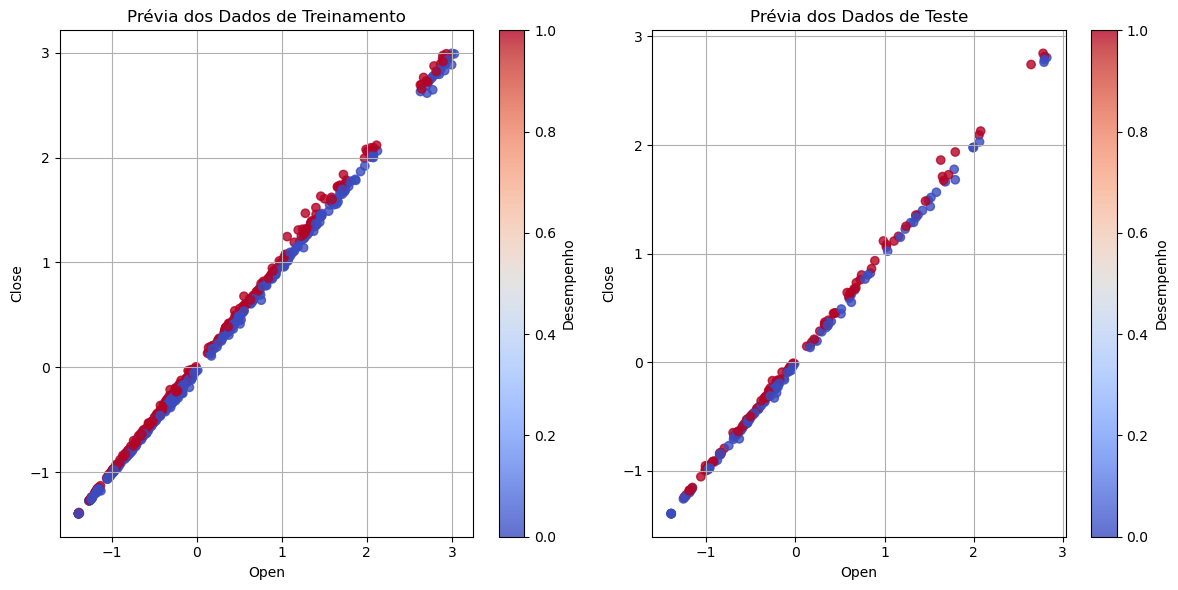

In [13]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Passo 1: Obter a lista de ações aleatórias listadas na bolsa brasileira
# Aqui, estamos usando uma lista fictícia de algumas ações apenas para fins de demonstração.

simbolos_ibov = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA',
                 'BBAS3.SA', 'WEGE3.SA', 'PETR3.SA', 'NTCO3.SA',
                 'ITSA4.SA', 'LREN3.SA', 'RENT3.SA', 'MGLU3.SA',
                 'RAIL3.SA', 'IRBR3.SA', 'BBDC3.SA', 'UGPA3.SA', 'ELET3.SA',
                 'SUZB3.SA', 'B3SA3.SA', 'CSAN3.SA', 'ECOR3.SA', 'CIEL3.SA',
                 'YDUQ3.SA', 'HAPV3.SA', 'EMBR3.SA', 'GOAU4.SA', 'SBSP3.SA',
                 'RADL3.SA', 'GOLL4.SA', 'CCRO3.SA',
                 'BEEF3.SA', 'NTCO3.SA', 'CYRE3.SA', 'CPFE3.SA',
                 'MGLU3.SA', 'VIVT3.SA', 'WEGE3.SA', 'JBSS3.SA', 'AZUL4.SA',
                 'IRBR3.SA', 'CSNA3.SA', 'SUZB3.SA', 
                 'UGPA3.SA', 'GOLL4.SA', 'RADL3.SA', 'EQTL3.SA',
                 'MRFG3.SA', 'CSAN3.SA', 'ECOR3.SA', 'CIEL3.SA',
                 'CMIG4.SA', 'GGBR4.SA', 'USIM5.SA', 'EMBR3.SA',
                 'ELET3.SA', 'SBSP3.SA', 'BRKM5.SA', 'LIGT3.SA',
                 'ENGI11.SA', 'EZTC3.SA', 'QUAL3.SA', 'MRVE3.SA', 'CPFE3.SA',
                 'CPLE6.SA', 'BBSE3.SA', 'FLRY3.SA', 'SBFG3.SA',
                 'YDUQ3.SA', 'HYPE3.SA', 'IRBR3.SA', 'RENT3.SA', 'CYRE3.SA',
                 'OIBR3.SA', 'KLBN11.SA',
                 'ENGI11.SA', 'VALE3.SA', 'CPLE6.SA', 'EMBR3.SA', 'NTCO3.SA',
                 'BRKM5.SA', 'MRFG3.SA', 'ELET3.SA', 'IRBR3.SA',
                 'BBSE3.SA', 'SBSP3.SA', 'CPFE3.SA', 'SBFG3.SA', 'QUAL3.SA']

# Coleta dos dados do Yahoo Finance para cada ação. 
#Os dados são coletados da biblioteca Yahoo Finance no período de 20 de junho de 2023 a 20 de julho de 2023.
dados_ibov = {}

for acao in simbolos_ibov:
    try:
        dados = yf.download(acao, start='2023-06-20', end='2023-07-20', progress=False)
        dados['Codigo'] = acao
        dados_ibov[acao] = dados
    except Exception as e:
        print(f"Erro ao coletar dados para a ação {acao}: {e}")

# Concatenar os dados de todas as ações em um único DataFrame
dados_total = pd.concat(dados_ibov.values())

#Passo 2 - Pré-processamento dos Dados: 
#Nesse passo, realizou-se o pré-processamento dos dados para prepará-los para a etapa de treinamento e teste dos modelos de classificação. 
#Isso inclui a criação da variável alvo binária (Desempenho) que representa o desempenho da ação no mês,com:
#0 para desempenho negativo (fechamento inferior à abertura) e 1 para desempenho positivo (fechamento superior à abertura).

dados_total['Desempenho'] = (dados_total['Close'] > dados_total['Open']).astype(int)


#Seleção das características financeiras para treinamento: 
# Seleciona-se as colunas 'Open', 'High', 'Low', 'Close' e 'Volume' do DataFrame dados_total para serem as 
# características (features) que serão utilizadas para treinamento e teste dos modelos.
X = dados_total[['Open', 'High', 'Low', 'Close', 'Volume']]


#Normalização das características numéricas:
# Nesse passo, normaliza-se as características numéricas (colunas 'Open', 'High', 'Low', 'Close' e 'Volume') utilizando a
#classe StandardScaler da biblioteca sklearn.preprocessing.
scaler = StandardScaler()
X = scaler.fit_transform(X)


#Codificação dos setores de atuação das ações em valores numéricos: 
# Codifica-se a variável alvo binária (Desempenho) em valores numéricos, onde 0 representa desempenho negativo e 
# 1 representa desempenho positivo.
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(dados_total['Desempenho'])

# Divisão dos dados em conjuntos de treinamento e teste utilizando hold-out (80% para treinamento, 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Plotando a prévia dos dados de treinamento e teste
plt.figure(figsize=(12, 6))

# Gráfico para os dados de treinamento
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 3], c=y_train, cmap='coolwarm', alpha=0.8)
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Prévia dos Dados de Treinamento')
plt.colorbar(label='Desempenho')
plt.grid(True)

# Gráfico para os dados de teste
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 3], c=y_test, cmap='coolwarm', alpha=0.8)
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Prévia dos Dados de Teste')
plt.colorbar(label='Desempenho')
plt.grid(True)

plt.tight_layout()
plt.show()


## Acima temos a prévia dos dados de treinamento e teste em dois gráficos lado a lado. Cada gráfico representa um atributo financeiro (eixo x: 'Open' e eixo y: 'Close'), e as cores das bolhas indicam o desempenho (0 para desempenho negativo e 1 para desempenho positivo) da ação nesse dia. Isso ajuda a visualizar a distribuição dos dados e como eles estão sendo divididos para treinamento e teste.

# Agora temos a execução dos modelos de classificação. 

Acurácia Média do K-NN: 0.5238578680203045
Acurácia Média do Naive Bayes: 0.4903553299492385
Acurácia Média da Árvore de Decisão: 0.6467005076142132


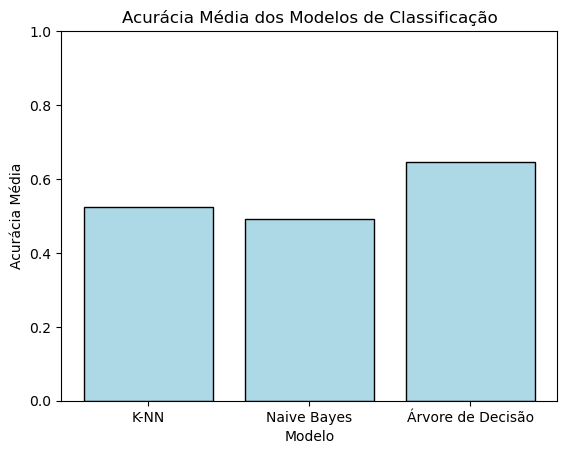

Relatório Médio de Classificação do K-NN:
               precision    recall  f1-score   support

           0       0.66      0.53      0.59       129
           1       0.35      0.47      0.40        68

    accuracy                           0.51       197
   macro avg       0.50      0.50      0.49       197
weighted avg       0.55      0.51      0.52       197


              precision    recall  f1-score   support

           0       0.54      0.57      0.56       108
           1       0.45      0.42      0.43        89

    accuracy                           0.50       197
   macro avg       0.49      0.49      0.49       197
weighted avg       0.50      0.50      0.50       197


              precision    recall  f1-score   support

           0       0.54      0.64      0.59       105
           1       0.48      0.38      0.42        92

    accuracy                           0.52       197
   macro avg       0.51      0.51      0.50       197
weighted avg       0.51      

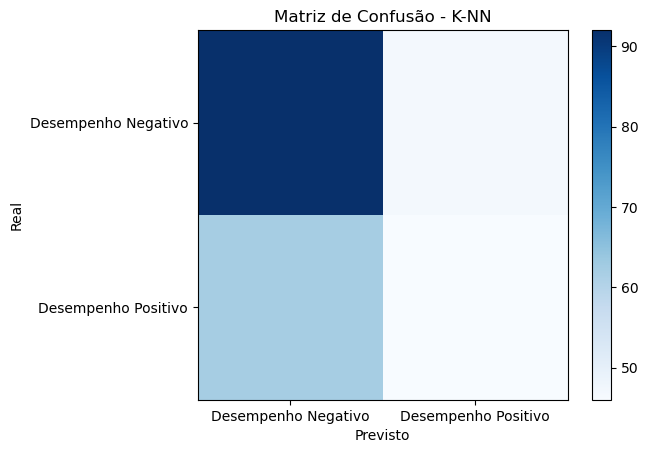

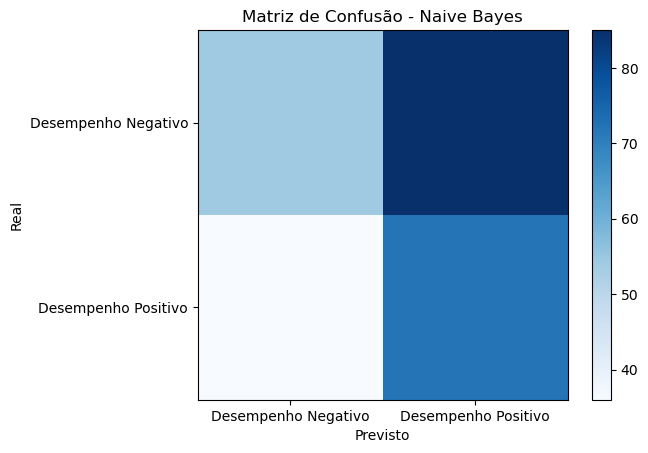

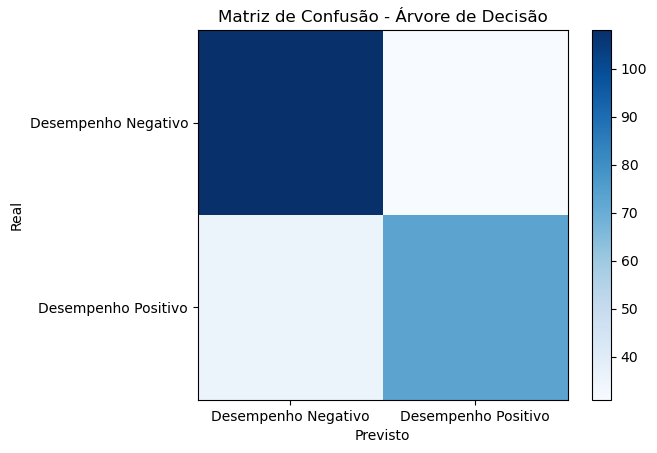

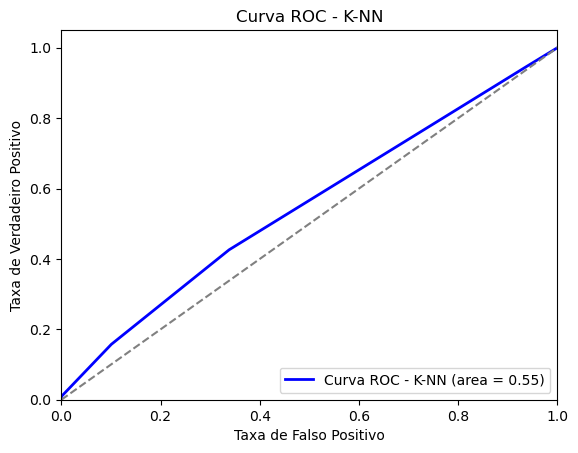

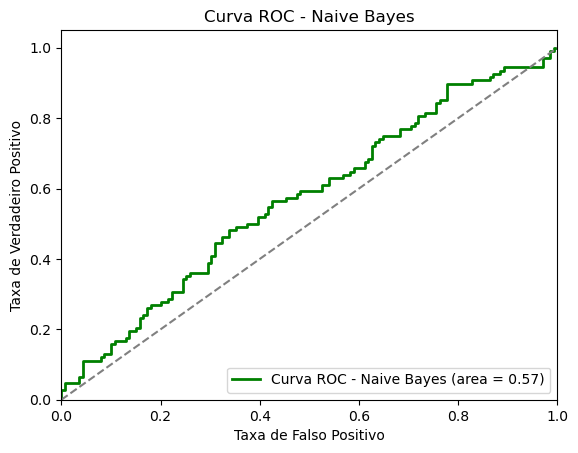

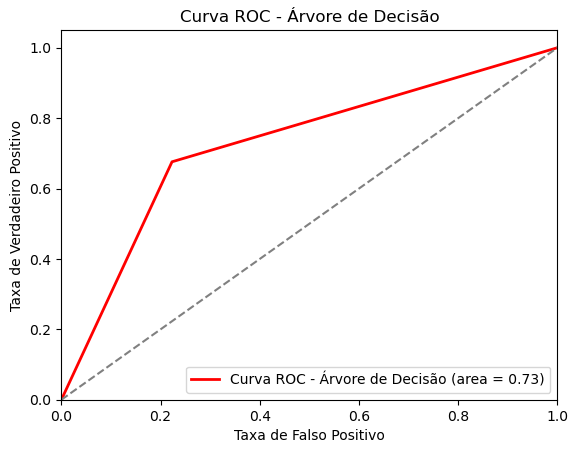

In [14]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Passo 1: Obter a lista de todas as ações do Ibovespa
# Certifique-se de verificar uma fonte atualizada para a lista de ações do Ibovespa
# Aqui, estamos usando uma lista fictícia de algumas ações apenas para fins de demonstração.

simbolos_ibov = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA',
                 'BBAS3.SA', 'WEGE3.SA', 'PETR3.SA', 'NTCO3.SA',
                 'ITSA4.SA', 'LREN3.SA', 'RENT3.SA', 'MGLU3.SA',
                 'RAIL3.SA', 'IRBR3.SA', 'BBDC3.SA', 'UGPA3.SA', 'ELET3.SA',
                 'SUZB3.SA', 'B3SA3.SA', 'CSAN3.SA', 'ECOR3.SA', 'CIEL3.SA',
                 'YDUQ3.SA', 'HAPV3.SA', 'EMBR3.SA', 'GOAU4.SA', 'SBSP3.SA',
                 'RADL3.SA', 'GOLL4.SA', 'CCRO3.SA',
                 'BEEF3.SA', 'NTCO3.SA', 'CYRE3.SA', 'CPFE3.SA',
                 'MGLU3.SA', 'VIVT3.SA', 'WEGE3.SA', 'JBSS3.SA', 'AZUL4.SA',
                 'IRBR3.SA', 'CSNA3.SA', 'SUZB3.SA', 
                 'UGPA3.SA', 'GOLL4.SA', 'RADL3.SA', 'EQTL3.SA',
                 'MRFG3.SA', 'CSAN3.SA', 'ECOR3.SA', 'CIEL3.SA',
                 'CMIG4.SA', 'GGBR4.SA', 'USIM5.SA', 'EMBR3.SA',
                 'ELET3.SA', 'SBSP3.SA', 'BRKM5.SA', 'LIGT3.SA',
                 'ENGI11.SA', 'EZTC3.SA', 'QUAL3.SA', 'MRVE3.SA', 'CPFE3.SA',
                 'CPLE6.SA', 'BBSE3.SA', 'FLRY3.SA', 'SBFG3.SA',
                 'YDUQ3.SA', 'HYPE3.SA', 'IRBR3.SA', 'RENT3.SA', 'CYRE3.SA',
                 'OIBR3.SA', 'KLBN11.SA',
                 'ENGI11.SA', 'VALE3.SA', 'CPLE6.SA', 'EMBR3.SA', 'NTCO3.SA',
                 'BRKM5.SA', 'MRFG3.SA', 'ELET3.SA', 'IRBR3.SA',
                 'BBSE3.SA', 'SBSP3.SA', 'CPFE3.SA', 'SBFG3.SA', 'QUAL3.SA']



# Coleta dos dados do Yahoo Finance para cada ação
dados_ibov = {}

for acao in simbolos_ibov:
    try:
        dados = yf.download(acao, start='2023-06-20', end='2023-07-20', progress=False)
        dados['Codigo'] = acao
        dados_ibov[acao] = dados
    except Exception as e:
        print(f"Erro ao coletar dados para a ação {acao}: {e}")

# Concatenar os dados de todas as ações em um único DataFrame
dados_total = pd.concat(dados_ibov.values())

# Passo 2: Pré-processamento dos Dados
# Criar a variável alvo binária (0 para desempenho negativo, 1 para desempenho positivo)
dados_total['Desempenho'] = (dados_total['Close'] > dados_total['Open']).astype(int)

# Selecionar as características financeiras para treinamento
X = dados_total[['Open', 'High', 'Low', 'Close', 'Volume']]

# Normalização das características numéricas
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Codificar os setores de atuação das ações em valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(dados_total['Desempenho'])

# Divisão dos dados em conjuntos de treinamento e teste utilizando hold-out (80% para treinamento, 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Definir o número de folds (k) para o K-Fold Cross Validation
num_folds = 5

# Inicialização de listas para armazenar resultados de avaliação
accuracy_scores_knn = []
accuracy_scores_nb = []
accuracy_scores_dt = []
classification_reports_knn = []
classification_reports_nb = []
classification_reports_dt = []

# K-Fold Cross Validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Implementação do Modelo K-NN
    knn_model = KNeighborsClassifier(n_neighbors=5)

    # Treinamento do Modelo K-NN
    knn_model.fit(X_train_fold, y_train_fold)

    # Avaliação do Modelo K-NN no conjunto de teste do fold atual
    y_pred_knn = knn_model.predict(X_test_fold)

    # Implementação do Modelo Naive Bayes
    nb_model = GaussianNB()

    # Treinamento do Modelo Naive Bayes
    nb_model.fit(X_train_fold, y_train_fold)

    # Avaliação do Modelo Naive Bayes no conjunto de teste do fold atual
    y_pred_nb = nb_model.predict(X_test_fold)

    # Implementação do Modelo Árvore de Decisão
    dt_model = DecisionTreeClassifier()

    # Treinamento do Modelo Árvore de Decisão
    dt_model.fit(X_train_fold, y_train_fold)

    # Avaliação do Modelo Árvore de Decisão no conjunto de teste do fold atual
    y_pred_dt = dt_model.predict(X_test_fold)

    # Avaliação do desempenho para cada fold
    accuracy_knn = accuracy_score(y_test_fold, y_pred_knn)
    accuracy_nb = accuracy_score(y_test_fold, y_pred_nb)
    accuracy_dt = accuracy_score(y_test_fold, y_pred_dt)

    accuracy_scores_knn.append(accuracy_knn)
    accuracy_scores_nb.append(accuracy_nb)
    accuracy_scores_dt.append(accuracy_dt)

    classification_report_knn = classification_report(y_test_fold, y_pred_knn, zero_division=1)
    classification_report_nb = classification_report(y_test_fold, y_pred_nb, zero_division=1)
    classification_report_dt = classification_report(y_test_fold, y_pred_dt, zero_division=1)

    classification_reports_knn.append(classification_report_knn)
    classification_reports_nb.append(classification_report_nb)
    classification_reports_dt.append(classification_report_dt)

# Resultados médios de avaliação do K-Fold Cross Validation
mean_accuracy_knn = np.mean(accuracy_scores_knn)
mean_accuracy_nb = np.mean(accuracy_scores_nb)
mean_accuracy_dt = np.mean(accuracy_scores_dt)

print("Acurácia Média do K-NN:", mean_accuracy_knn)
print("Acurácia Média do Naive Bayes:", mean_accuracy_nb)
print("Acurácia Média da Árvore de Decisão:", mean_accuracy_dt)

# Gráfico de barras para comparar a acurácia média dos modelos
models = ['K-NN', 'Naive Bayes', 'Árvore de Decisão']
accuracies = [mean_accuracy_knn, mean_accuracy_nb, mean_accuracy_dt]

plt.bar(models, accuracies, color='lightblue', edgecolor='black')
plt.xlabel('Modelo')
plt.ylabel('Acurácia Média')
plt.title('Acurácia Média dos Modelos de Classificação')
plt.ylim(0, 1)
plt.show()

# Relatório médio de classificação para cada modelo
mean_classification_report_knn = "\n\n".join(classification_reports_knn)
mean_classification_report_nb = "\n\n".join(classification_reports_nb)
mean_classification_report_dt = "\n\n".join(classification_reports_dt)

print("Relatório Médio de Classificação do K-NN:\n", mean_classification_report_knn)
print("\nRelatório Médio de Classificação do Naive Bayes:\n", mean_classification_report_nb)
print("\nRelatório Médio de Classificação da Árvore de Decisão:\n", mean_classification_report_dt)

# Matriz de Confusão para o Modelo K-NN
cm_knn = confusion_matrix(y_test, knn_model.predict(X_test))
plt.imshow(cm_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - K-NN')
plt.colorbar()
plt.xticks([0, 1], ['Desempenho Negativo', 'Desempenho Positivo'])
plt.yticks([0, 1], ['Desempenho Negativo', 'Desempenho Positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Matriz de Confusão para o Modelo Naive Bayes
cm_nb = confusion_matrix(y_test, nb_model.predict(X_test))
plt.imshow(cm_nb, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Naive Bayes')
plt.colorbar()
plt.xticks([0, 1], ['Desempenho Negativo', 'Desempenho Positivo'])
plt.yticks([0, 1], ['Desempenho Negativo', 'Desempenho Positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Matriz de Confusão para o Modelo Árvore de Decisão
cm_dt = confusion_matrix(y_test, dt_model.predict(X_test))
plt.imshow(cm_dt, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.colorbar()
plt.xticks([0, 1], ['Desempenho Negativo', 'Desempenho Positivo'])
plt.yticks([0, 1], ['Desempenho Negativo', 'Desempenho Positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Curva ROC para o Modelo K-NN
y_probs_knn = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
roc_auc_knn = roc_auc_score(y_test, y_probs_knn)

plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='Curva ROC - K-NN (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - K-NN')
plt.legend(loc="lower right")
plt.show()

# Curva ROC para o Modelo Naive Bayes
y_probs_nb = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_probs_nb)
roc_auc_nb = roc_auc_score(y_test, y_probs_nb)

plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='Curva ROC - Naive Bayes (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# Curva ROC para o Modelo Árvore de Decisão
y_probs_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
roc_auc_dt = roc_auc_score(y_test, y_probs_dt)

plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Curva ROC - Árvore de Decisão (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Árvore de Decisão')
plt.legend(loc="lower right")
plt.show()


A árvore de decisão obteve um desempenho superior comparado ao K-NN e o Naive Bayes, como pode ser visto no gráfico de 
de Acurácia média dos modelos de classificação e no relatório. 
Na curva de ROC pode-se verificar que a área abrangente do modelo de árvore de decisão se mostrou superior aos demais modelos. 

# Contudo, os resultados se alteram quando mudamos a periodicidade da análise. Após alguns testes, fiz a escolha por uma análise de curtissimo prazo, onde os dados coletados foram de 2 dias (19 a 20 de julho de 2023). Abaixo temos a apresentação dos dados

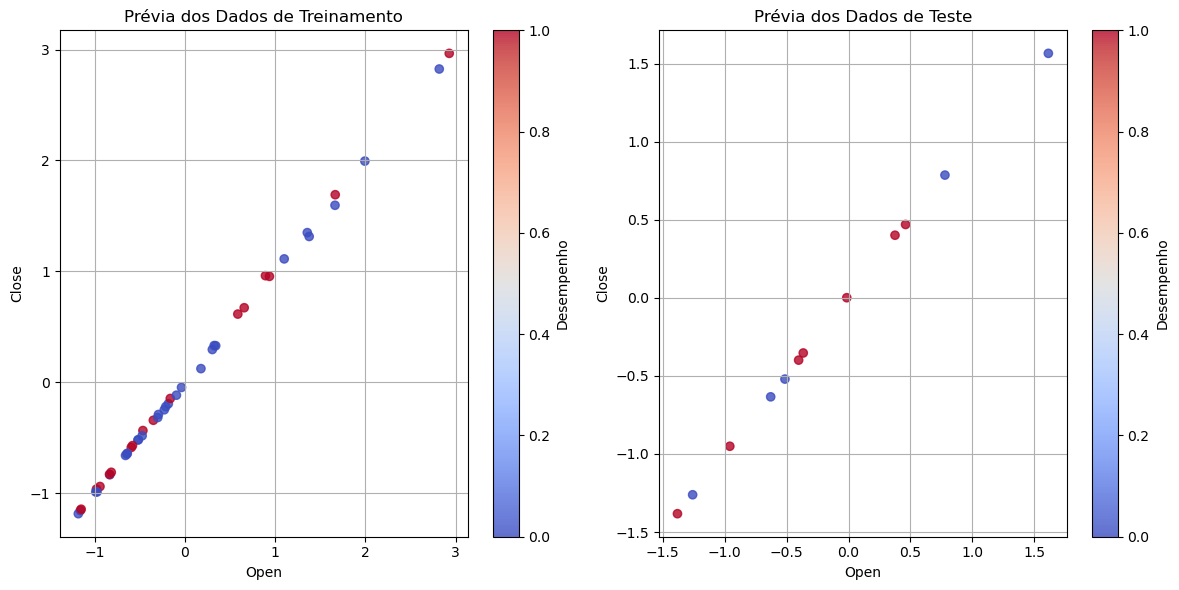

In [15]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Passo 1: Obter a lista de ações aleatórias listadas na bolsa brasileira
# Aqui, estamos usando uma lista fictícia de algumas ações apenas para fins de demonstração.

simbolos_ibov = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA',
                 'BBAS3.SA', 'WEGE3.SA', 'PETR3.SA', 'NTCO3.SA',
                 'ITSA4.SA', 'LREN3.SA', 'RENT3.SA', 'MGLU3.SA',
                 'RAIL3.SA', 'IRBR3.SA', 'BBDC3.SA', 'UGPA3.SA', 'ELET3.SA',
                 'SUZB3.SA', 'B3SA3.SA', 'CSAN3.SA', 'ECOR3.SA', 'CIEL3.SA',
                 'YDUQ3.SA', 'HAPV3.SA', 'EMBR3.SA', 'GOAU4.SA', 'SBSP3.SA',
                 'RADL3.SA', 'GOLL4.SA', 'CCRO3.SA',
                 'BEEF3.SA', 'NTCO3.SA', 'CYRE3.SA', 'CPFE3.SA',
                 'MGLU3.SA', 'VIVT3.SA', 'WEGE3.SA', 'JBSS3.SA', 'AZUL4.SA',
                 'IRBR3.SA', 'CSNA3.SA', 'SUZB3.SA', 
                 'UGPA3.SA', 'GOLL4.SA', 'RADL3.SA', 'EQTL3.SA',
                 'MRFG3.SA', 'CSAN3.SA', 'ECOR3.SA', 'CIEL3.SA',
                 'CMIG4.SA', 'GGBR4.SA', 'USIM5.SA', 'EMBR3.SA',
                 'ELET3.SA', 'SBSP3.SA', 'BRKM5.SA', 'LIGT3.SA',
                 'ENGI11.SA', 'EZTC3.SA', 'QUAL3.SA', 'MRVE3.SA', 'CPFE3.SA',
                 'CPLE6.SA', 'BBSE3.SA', 'FLRY3.SA', 'SBFG3.SA',
                 'YDUQ3.SA', 'HYPE3.SA', 'IRBR3.SA', 'RENT3.SA', 'CYRE3.SA',
                 'OIBR3.SA', 'KLBN11.SA',
                 'ENGI11.SA', 'VALE3.SA', 'CPLE6.SA', 'EMBR3.SA', 'NTCO3.SA',
                 'BRKM5.SA', 'MRFG3.SA', 'ELET3.SA', 'IRBR3.SA',
                 'BBSE3.SA', 'SBSP3.SA', 'CPFE3.SA', 'SBFG3.SA', 'QUAL3.SA']

# Coleta dos dados do Yahoo Finance para cada ação. 
#Os dados são coletados da biblioteca Yahoo Finance no período de 19 de julho de 2023 a 20 de julho de 2023.
dados_ibov = {}

for acao in simbolos_ibov:
    try:
        dados = yf.download(acao, start='2023-07-19', end='2023-07-20', progress=False)
        dados['Codigo'] = acao
        dados_ibov[acao] = dados
    except Exception as e:
        print(f"Erro ao coletar dados para a ação {acao}: {e}")

# Concatenar os dados de todas as ações em um único DataFrame
dados_total = pd.concat(dados_ibov.values())

#Passo 2 - Pré-processamento dos Dados: 
#Nesse passo, realizou-se o pré-processamento dos dados para prepará-los para a etapa de treinamento e teste dos modelos de classificação. 
#Isso inclui a criação da variável alvo binária (Desempenho) que representa o desempenho da ação no mês,com:
#0 para desempenho negativo (fechamento inferior à abertura) e 1 para desempenho positivo (fechamento superior à abertura).

dados_total['Desempenho'] = (dados_total['Close'] > dados_total['Open']).astype(int)


#Seleção das características financeiras para treinamento: 
# Seleciona-se as colunas 'Open', 'High', 'Low', 'Close' e 'Volume' do DataFrame dados_total para serem as 
# características (features) que serão utilizadas para treinamento e teste dos modelos.
X = dados_total[['Open', 'High', 'Low', 'Close', 'Volume']]


#Normalização das características numéricas:
# Nesse passo, normaliza-se as características numéricas (colunas 'Open', 'High', 'Low', 'Close' e 'Volume') utilizando a
#classe StandardScaler da biblioteca sklearn.preprocessing.
scaler = StandardScaler()
X = scaler.fit_transform(X)


#Codificação dos setores de atuação das ações em valores numéricos: 
# Codifica-se a variável alvo binária (Desempenho) em valores numéricos, onde 0 representa desempenho negativo e 
# 1 representa desempenho positivo.
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(dados_total['Desempenho'])

# Divisão dos dados em conjuntos de treinamento e teste utilizando hold-out (80% para treinamento, 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Plotando a prévia dos dados de treinamento e teste
plt.figure(figsize=(12, 6))

# Gráfico para os dados de treinamento
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 3], c=y_train, cmap='coolwarm', alpha=0.8)
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Prévia dos Dados de Treinamento')
plt.colorbar(label='Desempenho')
plt.grid(True)

# Gráfico para os dados de teste
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 3], c=y_test, cmap='coolwarm', alpha=0.8)
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Prévia dos Dados de Teste')
plt.colorbar(label='Desempenho')
plt.grid(True)

plt.tight_layout()
plt.show()


# Comparando a figura acima com o gráfico gerado na análise mensal, verifica-se uma maior dispersão dos dados, muito embora justificado pela quantidade de observações. 
# Contudo, como veremos abaixo, houve uma mudança quanto a escolha do melhor modelo de classificação. 

Acurácia Média do K-NN: 0.5888888888888889
Acurácia Média do Naive Bayes: 0.4972222222222221
Acurácia Média da Árvore de Decisão: 0.4083333333333333


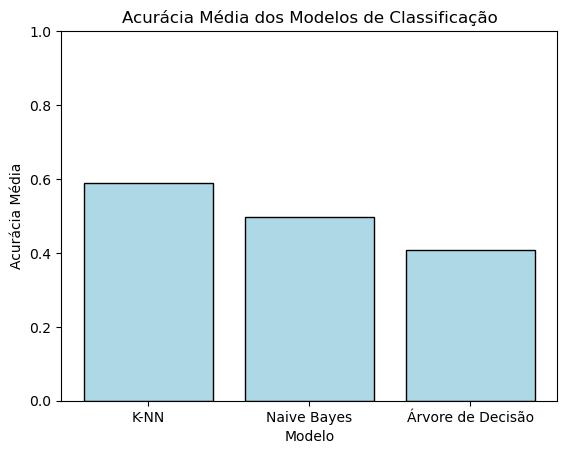

Relatório Médio de Classificação do K-NN:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.67      0.67      0.67         3

    accuracy                           0.78         9
   macro avg       0.75      0.75      0.75         9
weighted avg       0.78      0.78      0.78         9


              precision    recall  f1-score   support

           0       0.43      0.75      0.55         4
           1       0.50      0.20      0.29         5

    accuracy                           0.44         9
   macro avg       0.46      0.47      0.42         9
weighted avg       0.47      0.44      0.40         9


              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.33      1.00      0.50         1

    accuracy                           0.78         9
   macro avg       0.67      0.88      0.68         9
weighted avg       0.93      

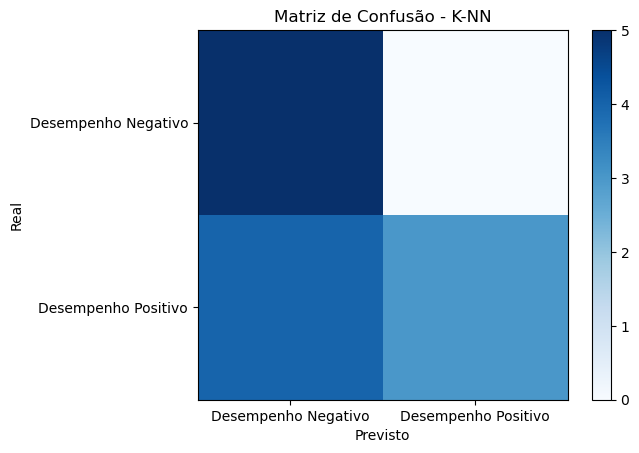

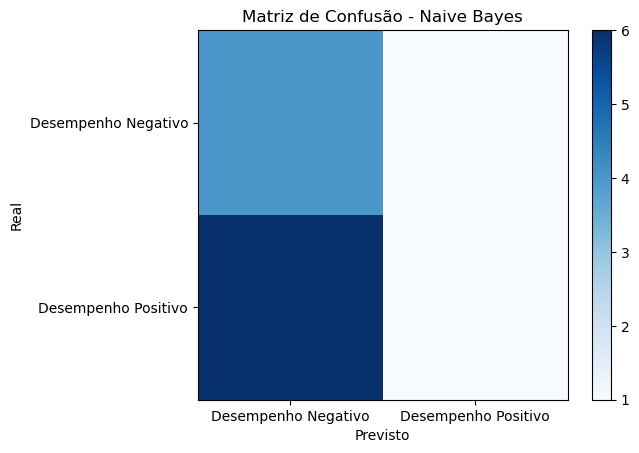

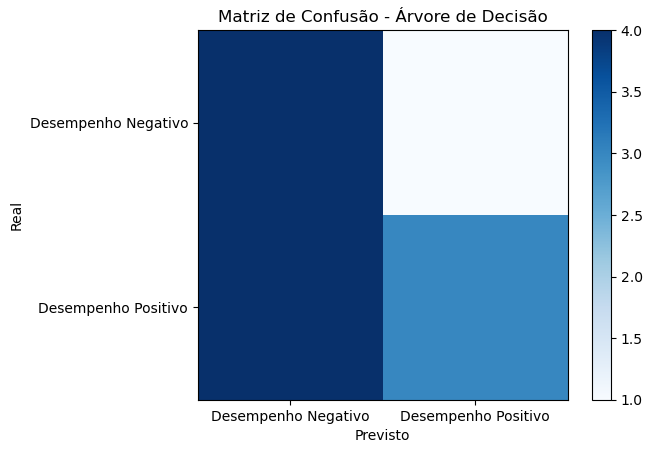

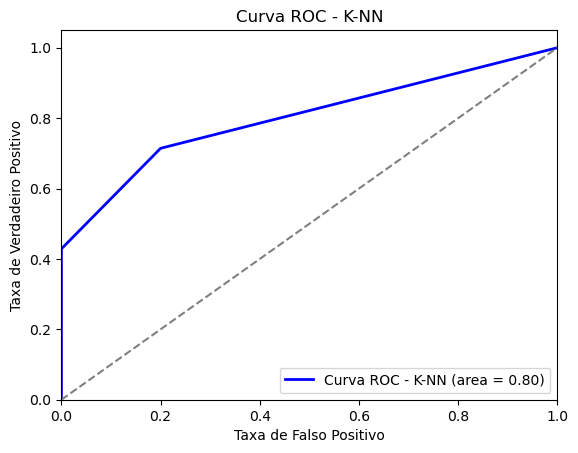

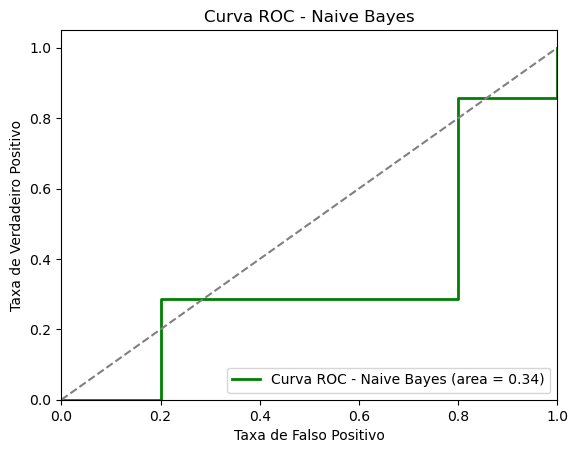

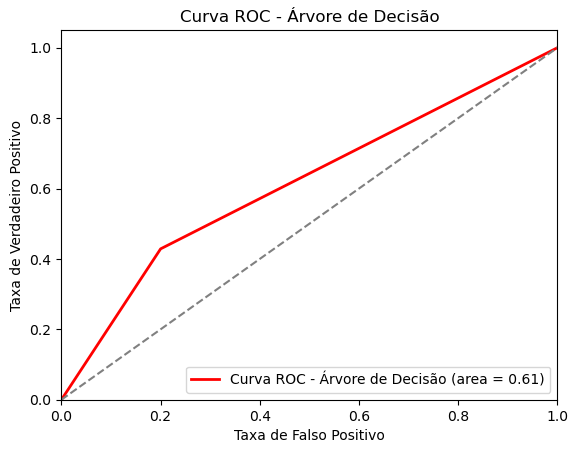

In [16]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

# Passo 1: Obter a lista de todas as ações do Ibovespa
# Certifique-se de verificar uma fonte atualizada para a lista de ações do Ibovespa
# Aqui, estamos usando uma lista fictícia de algumas ações apenas para fins de demonstração.

simbolos_ibov = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA',
                 'BBAS3.SA', 'WEGE3.SA', 'PETR3.SA', 'NTCO3.SA',
                 'ITSA4.SA', 'LREN3.SA', 'RENT3.SA', 'MGLU3.SA',
                 'RAIL3.SA', 'IRBR3.SA', 'BBDC3.SA', 'UGPA3.SA', 'ELET3.SA',
                 'SUZB3.SA', 'B3SA3.SA', 'CSAN3.SA', 'ECOR3.SA', 'CIEL3.SA',
                 'YDUQ3.SA', 'HAPV3.SA', 'EMBR3.SA', 'GOAU4.SA', 'SBSP3.SA',
                 'RADL3.SA', 'GOLL4.SA', 'CCRO3.SA',
                 'BEEF3.SA', 'NTCO3.SA', 'CYRE3.SA', 'CPFE3.SA',
                 'MGLU3.SA', 'VIVT3.SA', 'WEGE3.SA', 'JBSS3.SA', 'AZUL4.SA',
                 'IRBR3.SA', 'CSNA3.SA', 'SUZB3.SA', 
                 'UGPA3.SA', 'GOLL4.SA', 'RADL3.SA', 'EQTL3.SA',
                 'MRFG3.SA', 'CSAN3.SA', 'ECOR3.SA', 'CIEL3.SA',
                 'CMIG4.SA', 'GGBR4.SA', 'USIM5.SA', 'EMBR3.SA',
                 'ELET3.SA', 'SBSP3.SA', 'BRKM5.SA', 'LIGT3.SA',
                 'ENGI11.SA', 'EZTC3.SA', 'QUAL3.SA', 'MRVE3.SA', 'CPFE3.SA',
                 'CPLE6.SA', 'BBSE3.SA', 'FLRY3.SA', 'SBFG3.SA',
                 'YDUQ3.SA', 'HYPE3.SA', 'IRBR3.SA', 'RENT3.SA', 'CYRE3.SA',
                 'OIBR3.SA', 'KLBN11.SA',
                 'ENGI11.SA', 'VALE3.SA', 'CPLE6.SA', 'EMBR3.SA', 'NTCO3.SA',
                 'BRKM5.SA', 'MRFG3.SA', 'ELET3.SA', 'IRBR3.SA',
                 'BBSE3.SA', 'SBSP3.SA', 'CPFE3.SA', 'SBFG3.SA', 'QUAL3.SA']



# Coleta dos dados do Yahoo Finance para cada ação
dados_ibov = {}

for acao in simbolos_ibov:
    try:
        dados = yf.download(acao, start='2023-07-19', end='2023-07-20', progress=False)
        dados['Codigo'] = acao
        dados_ibov[acao] = dados
    except Exception as e:
        print(f"Erro ao coletar dados para a ação {acao}: {e}")

# Concatenar os dados de todas as ações em um único DataFrame
dados_total = pd.concat(dados_ibov.values())

# Passo 2: Pré-processamento dos Dados
# Criar a variável alvo binária (0 para desempenho negativo, 1 para desempenho positivo)
dados_total['Desempenho'] = (dados_total['Close'] > dados_total['Open']).astype(int)

# Selecionar as características financeiras para treinamento
X = dados_total[['Open', 'High', 'Low', 'Close', 'Volume']]

# Normalização das características numéricas
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Codificar os setores de atuação das ações em valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(dados_total['Desempenho'])

# Divisão dos dados em conjuntos de treinamento e teste utilizando hold-out (80% para treinamento, 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Definir o número de folds (k) para o K-Fold Cross Validation
num_folds = 5

# Inicialização de listas para armazenar resultados de avaliação
accuracy_scores_knn = []
accuracy_scores_nb = []
accuracy_scores_dt = []
classification_reports_knn = []
classification_reports_nb = []
classification_reports_dt = []

# K-Fold Cross Validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

    # Implementação do Modelo K-NN
    knn_model = KNeighborsClassifier(n_neighbors=5)

    # Treinamento do Modelo K-NN
    knn_model.fit(X_train_fold, y_train_fold)

    # Avaliação do Modelo K-NN no conjunto de teste do fold atual
    y_pred_knn = knn_model.predict(X_test_fold)

    # Implementação do Modelo Naive Bayes
    nb_model = GaussianNB()

    # Treinamento do Modelo Naive Bayes
    nb_model.fit(X_train_fold, y_train_fold)

    # Avaliação do Modelo Naive Bayes no conjunto de teste do fold atual
    y_pred_nb = nb_model.predict(X_test_fold)

    # Implementação do Modelo Árvore de Decisão
    dt_model = DecisionTreeClassifier()

    # Treinamento do Modelo Árvore de Decisão
    dt_model.fit(X_train_fold, y_train_fold)

    # Avaliação do Modelo Árvore de Decisão no conjunto de teste do fold atual
    y_pred_dt = dt_model.predict(X_test_fold)

    # Avaliação do desempenho para cada fold
    accuracy_knn = accuracy_score(y_test_fold, y_pred_knn)
    accuracy_nb = accuracy_score(y_test_fold, y_pred_nb)
    accuracy_dt = accuracy_score(y_test_fold, y_pred_dt)

    accuracy_scores_knn.append(accuracy_knn)
    accuracy_scores_nb.append(accuracy_nb)
    accuracy_scores_dt.append(accuracy_dt)

    classification_report_knn = classification_report(y_test_fold, y_pred_knn, zero_division=1)
    classification_report_nb = classification_report(y_test_fold, y_pred_nb, zero_division=1)
    classification_report_dt = classification_report(y_test_fold, y_pred_dt, zero_division=1)

    classification_reports_knn.append(classification_report_knn)
    classification_reports_nb.append(classification_report_nb)
    classification_reports_dt.append(classification_report_dt)

# Resultados médios de avaliação do K-Fold Cross Validation
mean_accuracy_knn = np.mean(accuracy_scores_knn)
mean_accuracy_nb = np.mean(accuracy_scores_nb)
mean_accuracy_dt = np.mean(accuracy_scores_dt)

print("Acurácia Média do K-NN:", mean_accuracy_knn)
print("Acurácia Média do Naive Bayes:", mean_accuracy_nb)
print("Acurácia Média da Árvore de Decisão:", mean_accuracy_dt)

# Gráfico de barras para comparar a acurácia média dos modelos
models = ['K-NN', 'Naive Bayes', 'Árvore de Decisão']
accuracies = [mean_accuracy_knn, mean_accuracy_nb, mean_accuracy_dt]

plt.bar(models, accuracies, color='lightblue', edgecolor='black')
plt.xlabel('Modelo')
plt.ylabel('Acurácia Média')
plt.title('Acurácia Média dos Modelos de Classificação')
plt.ylim(0, 1)
plt.show()

# Relatório médio de classificação para cada modelo
mean_classification_report_knn = "\n\n".join(classification_reports_knn)
mean_classification_report_nb = "\n\n".join(classification_reports_nb)
mean_classification_report_dt = "\n\n".join(classification_reports_dt)

print("Relatório Médio de Classificação do K-NN:\n", mean_classification_report_knn)
print("\nRelatório Médio de Classificação do Naive Bayes:\n", mean_classification_report_nb)
print("\nRelatório Médio de Classificação da Árvore de Decisão:\n", mean_classification_report_dt)

# Matriz de Confusão para o Modelo K-NN
cm_knn = confusion_matrix(y_test, knn_model.predict(X_test))
plt.imshow(cm_knn, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - K-NN')
plt.colorbar()
plt.xticks([0, 1], ['Desempenho Negativo', 'Desempenho Positivo'])
plt.yticks([0, 1], ['Desempenho Negativo', 'Desempenho Positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Matriz de Confusão para o Modelo Naive Bayes
cm_nb = confusion_matrix(y_test, nb_model.predict(X_test))
plt.imshow(cm_nb, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Naive Bayes')
plt.colorbar()
plt.xticks([0, 1], ['Desempenho Negativo', 'Desempenho Positivo'])
plt.yticks([0, 1], ['Desempenho Negativo', 'Desempenho Positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Matriz de Confusão para o Modelo Árvore de Decisão
cm_dt = confusion_matrix(y_test, dt_model.predict(X_test))
plt.imshow(cm_dt, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Árvore de Decisão')
plt.colorbar()
plt.xticks([0, 1], ['Desempenho Negativo', 'Desempenho Positivo'])
plt.yticks([0, 1], ['Desempenho Negativo', 'Desempenho Positivo'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Curva ROC para o Modelo K-NN
y_probs_knn = knn_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_probs_knn)
roc_auc_knn = roc_auc_score(y_test, y_probs_knn)

plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='Curva ROC - K-NN (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - K-NN')
plt.legend(loc="lower right")
plt.show()

# Curva ROC para o Modelo Naive Bayes
y_probs_nb = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_probs_nb)
roc_auc_nb = roc_auc_score(y_test, y_probs_nb)

plt.plot(fpr_nb, tpr_nb, color='green', lw=2, label='Curva ROC - Naive Bayes (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# Curva ROC para o Modelo Árvore de Decisão
y_probs_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_probs_dt)
roc_auc_dt = roc_auc_score(y_test, y_probs_dt)

plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Curva ROC - Árvore de Decisão (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Árvore de Decisão')
plt.legend(loc="lower right")
plt.show()


Pode-se verificar que na análise de curto prazo, o modelo K-NN obteve um desempenho superior aos demais modelos, e diferentemente da análise mensal, a Árvore de decisão obteve um desempenho inferior, como pode ser visto no grafico comparatuvo e nas curvas de ROC 

# Resultados alcançados: 

**Acurácia Média:** A acurácia média é uma medida geral de desempenho dos modelos. Ela nos diz qual a porcentagem média de acertos do modelo na classificação dos dados. Nesta base de dados, a acurácia média nos informa sobre a capacidade geral de cada modelo em acertar as classificações (desempenho positivo ou negativo das ações da bolsa brasileira).
Se a acurácia média do modelo for alta (próxima de 1), isso significa que o modelo está conseguindo acertar a maioria das classificações, o que é um bom sinal de que o modelo está se ajustando bem aos dados.
Se a acurácia média for baixa, isso pode indicar que o modelo não está performando bem, e talvez seja necessário considerar outras abordagens ou ajustes nos parâmetros do modelo.


**Relatórios Médios de Classificação:** Os relatórios médios de classificação fornecem métricas de avaliação para cada classe (desempenho positivo e desempenho negativo). Eles nos ajudam a entender como cada modelo está se comportando para cada uma das classes.

A **precisão** nos diz qual a proporção de classificações positivas que realmente são positivas. Nesta base de dados, isso significa a proporção de ações classificadas como "Desempenho Positivo" que realmente tiveram um desempenho positivo.
O **recall** (também conhecido como sensibilidade ou taxa de verdadeiro positivo) nos diz qual a proporção de instâncias positivas que foram corretamente identificadas pelo modelo. Isso significa a proporção de ações com desempenho positivo que foram corretamente classificadas como "Desempenho Positivo".
O **F1-score** é uma média harmônica entre precisão e recall e pode ser útil quando as classes têm um desequilíbrio significativo. Um valor mais alto indica um bom equilíbrio entre precisão e recall.
Ao analisar os relatórios médios de classificação, você pode determinar como cada modelo está lidando com as classificações de desempenho positivo e negativo. Um modelo com valores mais altos de precisão, recall e F1-score para ambas as classes é desejável, pois indica um bom desempenho em ambas as categorias.

A **matriz de confusão** é uma representação visual das previsões feitas pelo modelo em comparação com as classes reais do conjunto de teste. Ela nos permite entender como o modelo está classificando as instâncias em termos de verdadeiros positivos (TP), falsos positivos (FP), verdadeiros negativos (TN) e falsos negativos (FN). Vamos interpretar a matriz de confusão para cada modelo: K-NN, Naive Bayes e Árvore de Decisão.

**Verdadeiros Positivos (TP)**: São os casos em que o modelo previu corretamente a classe positiva (Desempenho Positivo) e a classe real também é positiva.
**Falsos Positivos (FP)**: São os casos em que o modelo previu incorretamente a classe positiva (Desempenho Positivo), mas a classe real é negativa (Desempenho Negativo).
**Verdadeiros Negativos (TN)**: São os casos em que o modelo previu corretamente a classe negativa (Desempenho Negativo) e a classe real também é negativa.

**Falsos Negativos (FN)**: São os casos em que o modelo previu incorretamente a classe negativa (Desempenho Negativo), mas a classe real é positiva (Desempenho Positivo).

Visualmente, pode-se verificar que na análise mensal, a Árvore de decisão apresentou altos valores na diagonal principal da matriz (TP + TN) e baixos valores para para a diagonal fora da matriz (FP + FN), indicando uma superioridade deste modelo. A mesma análise pode ser feita para o K-NN na análise diária dos dados, ou seja, acertando mais os VP + TN se comparado ao Nayve Baynes e Árvore de decisão. 


As **curvas ROC e as áreas sob a curva (AUC)** fornecem informações sobre a capacidade do modelo de distinguir entre as classes positiva e negativa em diferentes pontos de corte de probabilidade.

Uma curva ROC próxima ao canto superior esquerdo indica que o modelo tem uma alta taxa de verdadeiros positivos e uma baixa taxa de falsos positivos, o que é desejável. Na análise **Mensal** a **Árvore de decisão** se mostrou superior aos demais modelos. Contudo, na análise de desempenho **diário** o **K-NN** se mostrou superior. 

**Área sobre a curva (AUC) na análise mensal: KNN = 0,55 ; Nayve Baynes = 0,57 ; Árvore de decisão = 0,74
Área sobre a curva (AUC) na análise diária: KNN = 0,80 ; Nayve Baynes = 0,34 ; Árvore de decisão = 0,61**


Uma AUC próxima de 1 também indica que o modelo tem uma boa capacidade de distinguir entre as classes, com uma alta probabilidade de classificar corretamente instâncias de ambas as classes.
Ao analisar as curvas ROC e as AUC dos modelos, você pode determinar como eles estão se saindo na tarefa de classificação e como eles lidam com o trade-off entre taxas de verdadeiros e falsos positivos.

Com base nessas análises, identificou-se que o a Árvore de decisão se mostra superior para análises de dados mensal pois e a obteve uma acurácia média alta, bons valores de precisão, recall e F1-score para ambas as classes e uma AUC próxima de 1, isso sugere que ela é a melhor escolha para a classificação dos dados mensais. 
A mesma análise pode ser feita para o KNN quando utiliza-se a base de dados semanal. 

**PS: Tal trabalho obtem, de forma automatizada, a base de dados dentro Yahoo Finance. Para uma análise exploratória dos resultados, basta que o usuário altere os ativos financeiros no comando "simbolos_ibov" (podendo utilizar ações, opções, fundos imobiliários, dentre outros) e faça as devidas alterações no comando "dados = yf.download(acao, start='2023-07-19', end='2023-07-20', progress=False)" para ajustar a periodicidade dos dados.** 